### Loan Prediction.
Challenge Date & Time: 26-05-2016 12:01 AM to 31-08-2020 11:59 PM

Public Leader board Name - Bala Iyappa

Link for leaderboard- https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#LeaderBoard

### Importing the required libraries.

In [341]:
#import required liberies
import pandas as pd
import numpy as np                 # For mathematical calculations 
import seaborn as sns              # For data visualization 
import matplotlib.pyplot as plt    # For plotting graphs 
%matplotlib inline 
import warnings                    # To ignore any warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


In [342]:
# set global configrations
pd.options.display.max_columns=None

In [343]:
#import data
train = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/AV/Loan AV/train.csv', header=0)


In [344]:
test = pd.read_csv('C:/Users/SiviSoft/Desktop/Bala/AV/Loan AV/test.csv', header=0)

In [345]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory data analysis(EDA)

In [346]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [347]:
#train=train.drop('Loan_ID',axis=1)
#train.set_index('Loan_ID', inplace=True)

In [348]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

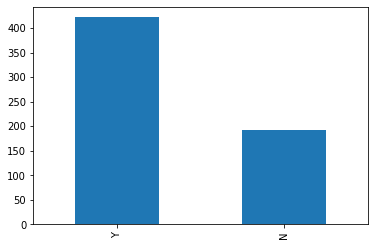

In [349]:
train['Loan_Status'].value_counts().plot.bar()

In [350]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Preprocessing

In [351]:
replace_dict = {
            "Married": {"Yes": 1, "No": 0},
            "Education": {"Graduate": 1, "Not Graduate": 0},
            "Gender": {"Male": 1, "Female": 0},
            "Property_Area": {"Urban": 2, "Semiurban": 1, "Rural": 0},
            "Self_Employed": {"Yes": 1, "No": 0},
            "Loan_Status": {"Y": 1, "N": 0},
            "Dependents": {"3+": 4}
}

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train = train.replace(replace_dict)

In [352]:
replace_dict = {
            "Married": {"Yes": 1, "No": 0},
            "Education": {"Graduate": 1, "Not Graduate": 0},
            "Gender": {"Male": 1, "Female": 0},
            "Property_Area": {"Urban": 2, "Semiurban": 1, "Rural": 0},
            "Self_Employed": {"Yes": 1, "No": 0},
            "Loan_Status": {"Y": 1, "N": 0},
            "Dependents": {"3+": 4}
}

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test = test.replace(replace_dict)

In [353]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [354]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [355]:
#le = preprocessing.LabelEncoder()
#train_obj[:] = le.fit_transform(train_obj[:])
#df['TEAM_LEAD_NAME'] = lbl.fit_transform(df['TEAM_LEAD_NAME'])

#train_obj = train_obj.apply(le.fit_transform)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217308C5A48>,
      dtype=object)

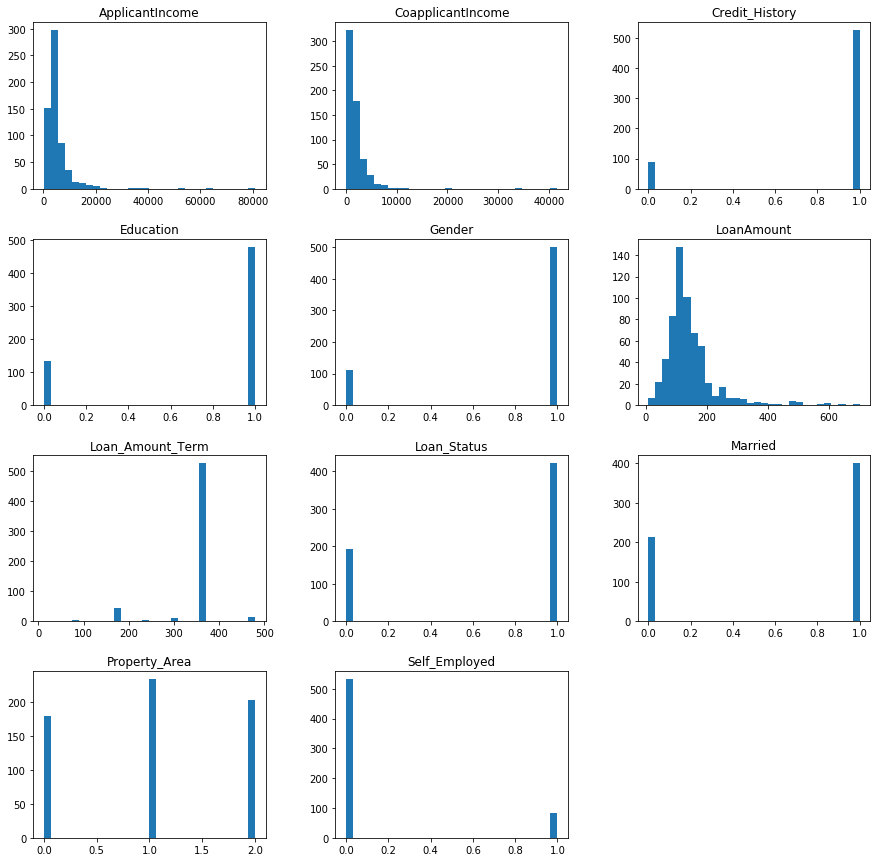

In [356]:
train.hist(bins=30,figsize=(15,15),grid=False)

In [357]:
corr_matrix = train.corr()
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

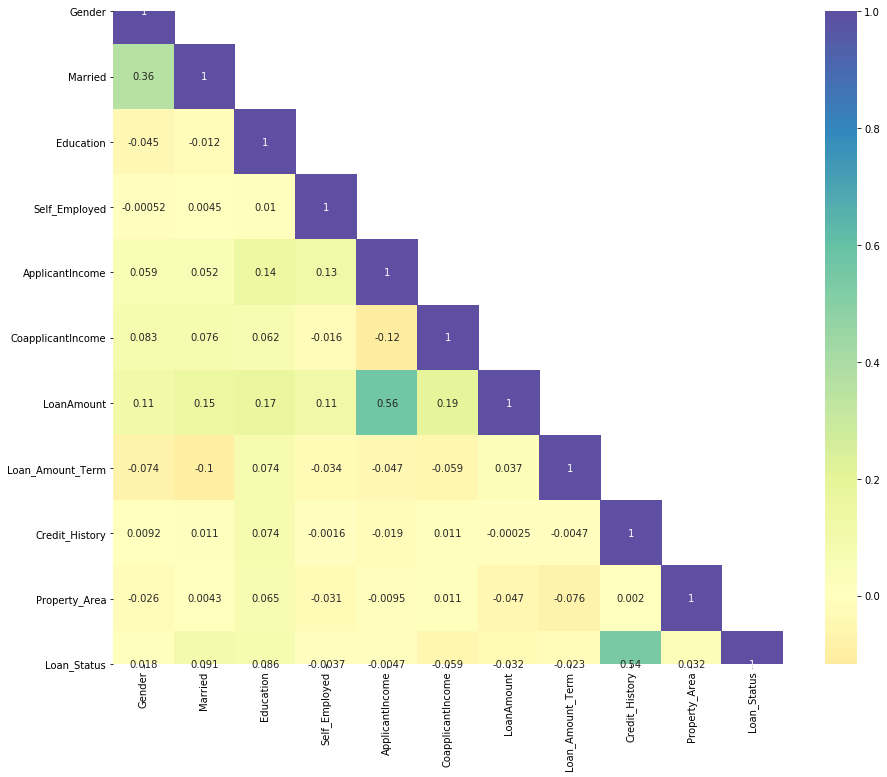

In [358]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, center=0, cmap="Spectral")

In [359]:
#corr_matrix['Loan_Status'].sort_values(ascending=False)

### Data Modelling

In [360]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [361]:
X_train = train.drop("Loan_Status", axis=1)
X_train = X_train.drop("Loan_ID", axis=1)
Y_train = train["Loan_Status"].values
X_test = test.drop("Loan_ID", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

In [362]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [363]:
#X=pd.get_dummies(X) 
#df=pd.get_dummies(df) 


In [364]:
X_train.shape, Y_train.shape, X_test.shape

((614, 11), (614,), (367, 11))

In [365]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 50)

In [366]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.00,1.0,0.0,0.070489,0.000000,0.160637,0.743590,1.0,1.0
1,1.0,1.0,0.25,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.00,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.00,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.00,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.00,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.00,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.25,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.50,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [368]:
estimator=LogisticRegression()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
log_re =round( estimator.score(X_train, Y_train)* 100, 2)
log_re

80.94

In [369]:
estimator=RandomForestClassifier(n_estimators=100)
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
rf_acc = round( estimator.score(X_train, Y_train)* 100, 2)
rf_acc

100.0

In [331]:
estimator=DecisionTreeClassifier()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
dtc_acc = round( estimator.score(X_train, Y_train)* 100, 2)
dtc_acc

100.0

In [332]:
estimator=SGDClassifier()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
sgd_acc = round( estimator.score(X_train, Y_train)* 100, 2)
sgd_acc

81.27

In [333]:
estimator=SVC()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
svc_acc = round( estimator.score(X_train, Y_train)* 100, 2)
svc_acc

80.94

In [334]:
estimator=LinearSVC()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
lsvc_acc = round( estimator.score(X_train, Y_train)* 100, 2)
lsvc_acc

81.27

In [335]:
estimator=GaussianNB()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
gnb_acc = round( estimator.score(X_train, Y_train)* 100, 2)
gnb_acc

79.8

In [336]:
estimator=KNeighborsClassifier()
estimator.fit(X_train,Y_train)
# Predict on the test data
ypred = estimator.predict(X_test)
knn_acc = round( estimator.score(X_train, Y_train)* 100, 2)
knn_acc

82.41

### Scores of all Predictions

In [337]:
models = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest','Decision Tree','Stochastic Gradient Descent',
                  'Support Vector Machines','Linear SVC','Naive Bayes','KNN'],
        'Score': [log_re, rf_acc, dtc_acc, sgd_acc, svc_acc, lsvc_acc, gnb_acc, knn_acc]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,100.00
2,Decision Tree,100.00
7,KNN,82.41
3,Stochastic Gradient Descent,81.27
5,Linear SVC,81.27
0,Logistic Regression,80.94
4,Support Vector Machines,80.94
6,Naive Bayes,79.80


In [370]:
ypred = ypred.tolist()
for i in range(len(ypred)):
    if ypred[i] == 1:
        ypred[i] = 'Y'
    else:
        ypred[i] = 'N'
y_pred = np.array(ypred)

In [371]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": y_pred
    })


In [373]:
submission.to_csv('./submission_loan.csv', index=False)